In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
data = pd.read_csv('datafinal1.csv')
data.head()

,Unnamed: 0,country_code,country_name,year,Median age (years),"Net migration rate (per 1,000 people)",Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Mean years of schooling, female (years)",...,"Suicide rate, female (per 100,000 people)",Ratio of education and health expenditure to military expenditure,Current health expenditure (% of GDP),"Age-standarized mortality rate attributed to noncommunicable diseases, female","Age-standarized mortality rate attributed to noncommunicable diseases, male","Carbon dioxide emissions, per capita (tonnes)",Carbon dioxide emissions (kg per 2010 US$ of GDP),"Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),Fossil fuel energy consumption (% of total energy consumption)
0,0,AFG,Afghanistan,1990,15.8,-25.1,8.2,2.3,13.6,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1340.0,15.9,0.0
1,1,AFG,Afghanistan,1995,16.0,40.3,9.8,3.5,15.7,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1270.0,35.1,0.0
2,2,AFG,Afghanistan,2000,15.5,-8.9,11.1,4.5,17.0,0.8,...,1.7,0.0,0.0,857.8,997.8,0.0,0.0,1100.0,54.2,0.0
3,3,AFG,Afghanistan,2005,16.0,6.4,14.5,6.3,22.3,1.0,...,0.0,0.0,9.9,0.0,0.0,0.0,0.0,821.0,40.9,0.0
4,4,AFG,Afghanistan,2010,15.9,-7.6,18.2,5.9,29.8,1.2,...,2.1,6.2,8.6,826.1,946.0,0.0,0.0,584.0,14.8,0.0


In [13]:
from sklearn.cluster import KMeans
dataset = data.iloc[:, 3:].values
data_norm = (dataset-dataset.min())/(dataset.max()-dataset.min())
data_norm

array([[0.0147216 , 0.00123824, 0.0009589 , ..., 0.01028224, 0.00123892,
        0.00113033],
       [0.01475575, 0.00123961, 0.00140557, ..., 0.00980416, 0.00137005,
        0.00113033],
       [0.0147899 , 0.00123619, 0.00106954, ..., 0.00864309, 0.0015005 ,
        0.00113033],
       ...,
       [0.01482405, 0.00125531, 0.00105042, ..., 0.00542626, 0.00167808,
        0.00133727],
       [0.0148582 , 0.00125736, 0.00107364, ..., 0.00417641, 0.00169652,
        0.00130039],
       [0.01489235, 0.001256  , 0.00106613, ..., 0.00415592, 0.00168901,
        0.00113033]])

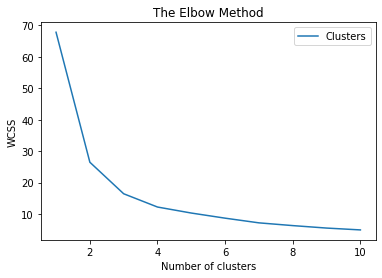

In [14]:
wcss= []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, label='Clusters')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

In [15]:
kmeansM = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_M = kmeansM.fit_predict(data_norm)

In [16]:
centroids_V = kmeansM.cluster_centers_
centroids_V[0]

array([0.01480094, 0.00129058, 0.00111487, 0.00137936, 0.00136404,
       0.00140403, 0.00116609, 0.00117237, 0.00120038, 0.00167738,
       0.00146682, 0.00140236, 0.00145344, 0.00134249, 0.00147205,
       0.00164131, 0.00113751, 0.00115859, 0.0013021 , 0.00123156,
       0.00126024, 0.00119822, 0.00113251, 0.00157477, 0.0012018 ,
       0.00113121, 0.0011315 , 0.00118079, 0.00117883, 0.00117083,
       0.00113507, 0.00113429, 0.00113358, 0.00124471, 0.00159144,
       0.00155848, 0.00155165, 0.00119358, 0.00119184, 0.00119382,
       0.02400285, 0.04803505, 0.0013918 , 0.00114615, 0.00115967,
       0.04862267, 0.00113292, 0.00113317, 0.00113409, 0.00113445,
       0.0011885 , 0.05047663, 0.00295281, 0.00155592, 0.00152164,
       0.00138979, 0.0014265 , 0.00137156, 0.00113924, 0.00113874,
       0.00139366, 0.00136163, 0.00115132, 0.00113118, 0.00117992,
       0.00118125, 0.00111335, 0.00117886, 0.00113124, 0.00125896,
       0.00158918, 0.00123669, 0.00119531, 0.00127114, 0.00121

In [17]:
centroids_V[1]

array([0.01483007, 0.00135726, 0.00125413, 0.001596  , 0.00159921,
       0.00160162, 0.00119626, 0.00119632, 0.00122008, 0.00124929,
       0.00115966, 0.00115078, 0.00171801, 0.0017427 , 0.00147853,
       0.00167428, 0.00113752, 0.00113391, 0.00114515, 0.001284  ,
       0.00116809, 0.00114499, 0.00113174, 0.00165914, 0.00122532,
       0.00113182, 0.00113295, 0.00114652, 0.00114505, 0.00119581,
       0.00113636, 0.00113709, 0.00113515, 0.00120074, 0.00167155,
       0.00164789, 0.00133438, 0.00120076, 0.00122135, 0.00121659,
       0.32243454, 0.67113221, 0.001682  , 0.00113212, 0.00113155,
       0.55963858, 0.00113541, 0.00113552, 0.00113613, 0.00113623,
       0.00115371, 0.55362476, 0.00261852, 0.00160201, 0.0015865 ,
       0.00114927, 0.00162213, 0.00113194, 0.00115014, 0.00114646,
       0.00135752, 0.00151017, 0.00117631, 0.00113149, 0.00114182,
       0.00115229, 0.00109823, 0.00114154, 0.00113153, 0.00123651,
       0.00210349, 0.00117579, 0.00147943, 0.00127456, 0.00138

In [19]:
a = pd.DataFrame(centroids_V)

In [20]:
#a.to_csv('centroides.csv')

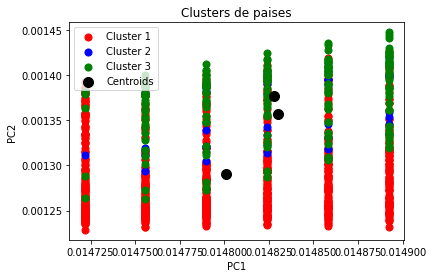

In [21]:
plt.scatter(data_norm[y_kmeans_M == 0, 0], data_norm[y_kmeans_M== 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(data_norm[y_kmeans_M == 1, 0], data_norm[y_kmeans_M == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(data_norm[y_kmeans_M == 2, 0], data_norm[y_kmeans_M == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeansM.cluster_centers_[:, 0], kmeansM.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters de paises')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()